### Combining Thresholds

In [1]:
%matplotlib inline

In [2]:
"""     
NOTE: To Fine Tune Lane Line Detection For Image:  
      change the values in the section labeled  
    `'# CHANGE THESE VALUES TO FINE LANE LINE DETECTION FOR IMAGE'`  
      (at the time of this writing, it's at line #48 - this may change over time)
"""
''

''

Full-Size Combined Thresholds image saved as: 
l24-my-outputs-from-combining-thresholds/l24_combined_k-11_x-15-100_y-15-100_m-30-100_d-0.7-1.4.png


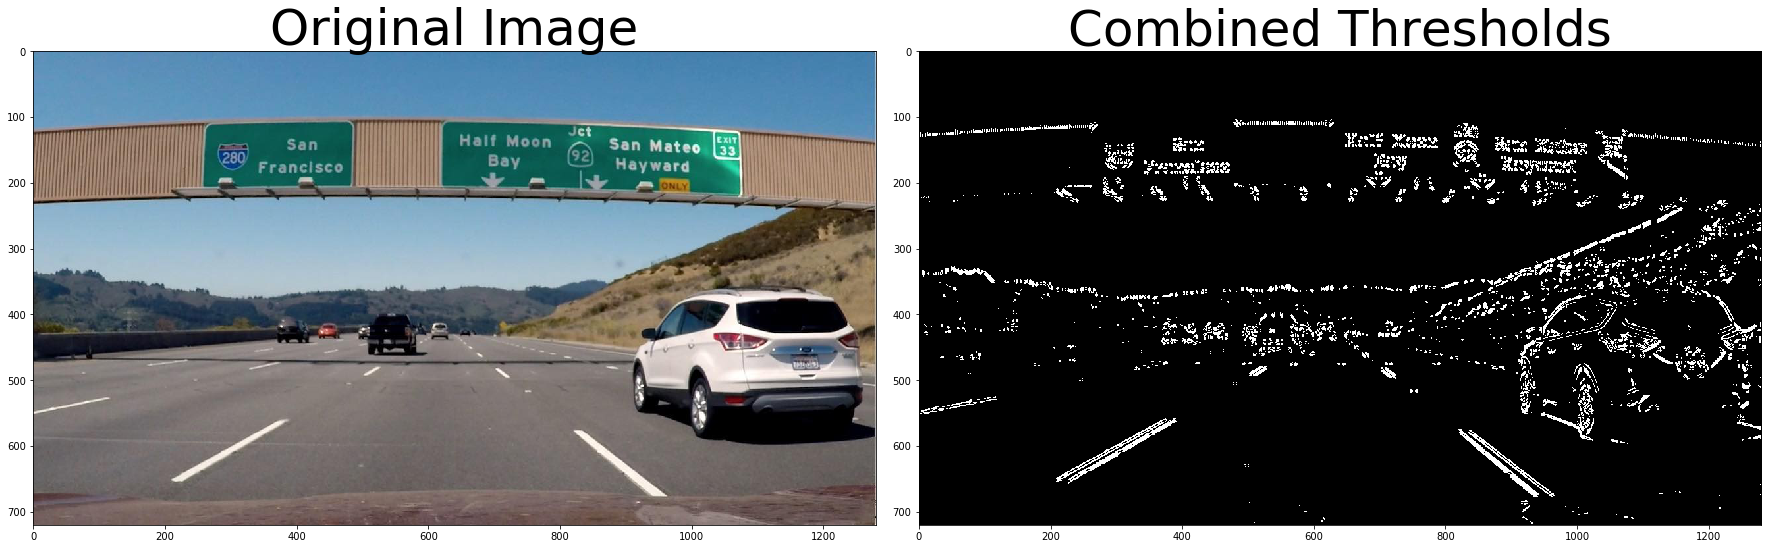

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def abs_sobel_thresh(gray, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    dirx, diry = (0,0)
    if   orient == 'x': dirx = 1
    elif orient == 'y': diry = 1
    else: print('invalid orientation must be "x" or "y"')
    sobel = cv2.Sobel(gray, cv2.CV_64F, dirx, diry, ksize=sobel_kernel)
    abs_sobel = np.absolute(sobel)
    scaled = np.uint8(255 * abs_sobel/np.max(abs_sobel))
    # Apply threshold
    grad_binary = np.zeros_like(gray)
    grad_binary[(scaled >= thresh[0]) & (scaled <= thresh[1]) ] = 1
    return grad_binary

def magnitude_threshold(gray, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
    scaled = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Apply threshold
    mag_binary = np.zeros_like(gray)
    mag_binary[ (scaled >= mag_thresh[0]) & scaled <= mag_thresh[1] ] = 1
    return mag_binary

def direction_threshold(gray, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    sobelx_abs = np.absolute(sobelx)
    sobely_abs = np.absolute(sobely)
    dir = np.arctan2(sobely_abs, sobelx_abs)
    # Apply threshold
    dir_binary = np.zeros_like(gray)
    dir_binary[ (dir <= thresh[0]) & (dir >= thresh[1]) ] = 1
    return dir_binary

image_color = mpimg.imread('signs_vehicles_xygrad.png')
# convert to gray here so its only done once. Don'e need the color version inside other functions
image_gray  = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)


# CHANGE THESE VALUES TO FINE LANE LINE DETECTION FOR IMAGE
# Choose a Sobel kernel size
ksize = 11 # Choose a larger odd number to smooth gradient measurements
gradx_thresh  = (15, 100)  # values in range: (0,255)
grady_thresh  = (15, 100)  # values in range: (0,255)
mag_thresh    = (30, 100)  # values in range: (0,255)
dir_thresh    = (0.7,1.4)  # values in range: (0,np.pi/2)

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(  image_gray, orient='x', sobel_kernel=ksize, thresh=gradx_thresh)    #(0,255)
grady = abs_sobel_thresh(  image_gray, orient='y', sobel_kernel=ksize, thresh=grady_thresh)    #(0,255)
mag_binary = magnitude_threshold(image_gray,       sobel_kernel=ksize, mag_thresh=mag_thresh)  #(0,255)
dir_binary = direction_threshold(image_gray,       sobel_kernel=ksize, thresh=dir_thresh) #(0, np.pi/2)

combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1


# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image_color)
ax1.set_title('Original Image', fontsize=50)

# ax2.imshow(gradx, cmap='gray')
ax2.imshow(combined, cmap='gray')
ax2.set_title('Combined Thresholds', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

settings = '_k-'+str(ksize)   + \
           '_x-'+str(gradx_thresh[0])+'-'+str(gradx_thresh[1]) + \
           '_y-'+str(grady_thresh[0])+'-'+str(grady_thresh[1]) + \
           '_m-'+str(mag_thresh[0])  +'-'+str(mag_thresh[1])   + \
           '_d-'+str(dir_thresh[0])  +'-'+str(dir_thresh[1])
            
combined_filename = 'l24-my-outputs-from-combining-thresholds/l24_combined'+settings+'.png'

# TODO: correct format of saved files: grayscale looks like purple and yellow.
mpimg.imsave(combined_filename, combined)
# # convert from GRAY to BGR before saving with cv2.imwrite
# combined_color = cv2.cvtColor(combined, cv2.COLOR_GRAY2BGR)
# cv2.imwrite(combined_filename, combined_color)

print('Full-Size Combined Thresholds image saved as: \n' + combined_filename)


#### Read Me
#### instructions

### Combining Thresholds  
If you play around with the thresholds in the last exercise, you'll find that you can start to identify the lane lines by gradient direction alone by setting the threshold around `thresh = (0.7, 1.3`), but there's still a lot of noise in the resulting image.  

Now consider how you can use various aspects of your gradient measurements ***(x, y, magnitude, direction)** to isolate lane-line pixels. Specifically, think about how you can use thresholds of the x and y gradients, the overall gradient magnitude, and the gradient direction to focus on **pixels that are likely to be part of the lane lines**.  

#### Challenge:  
In the project at the end of this section, you'll want to experiment with thresholding various aspects of the gradient, so now would be a great time to start coding it up on your local machine! Grab the image we've been working with for the last three quizzes *here (or a smaller jpg file here)*.  

Combine the selection thresholds from the last 3 quizzes to write a piece of code like the following, where you can play with various thresholds and see the output.  

```
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    return dir_binary

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(0, 255))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(0, 255))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(0, 255))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0, np.pi/2))
```
Try different combinations and see what you get.  

For example, here is a selection for pixels where either: 
  - both the x and y gradients meet the threshold criteria, or 
  - both the gradient magnitude and direction are within their threshold values.  

```
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
```
Output  
Here is an example of a binary result from multiple thresholds:  
<img src='l24-binary-combo-example.jpg' />